In [454]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from database.TradeHistory import get_session, History
from database.db_utils import get_recent_hist15_df
import datetime
import pandas as pd

In [926]:
session = get_session()
past_time = datetime.datetime.utcnow() - datetime.timedelta(weeks=2)
df = get_recent_hist15_df(past_time, session)
df

,price,size,exec_date
0,1.517863e+06,229.245899,2017-12-31 08:45:00
1,1.513837e+06,177.880571,2017-12-31 09:00:00
2,1.519243e+06,187.685246,2017-12-31 09:15:00
3,1.517370e+06,164.235412,2017-12-31 09:30:00
4,1.518595e+06,93.098279,2017-12-31 09:45:00
5,1.519609e+06,134.116109,2017-12-31 10:00:00
6,1.524674e+06,136.531023,2017-12-31 10:15:00
7,1.538337e+06,435.119798,2017-12-31 10:30:00
8,1.546779e+06,232.079170,2017-12-31 10:45:00
9,1.554335e+06,271.414733,2017-12-31 11:00:00


In [927]:
def zs(p, n, shift=0):
    return (p.shift(shift) - p.rolling(n).mean()) / p.rolling(n).std()


def avg(p, n):
    return p.rolling(n).mean()


def std(p, n):
    return p.rolling(n).std()

In [928]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')

In [929]:
bench_price = df.price
bench_size = df['size']
dfb = pd.DataFrame([bench_price, bench_size]).T

p = dfb.price
v = dfb['size']

dfb['pma12'] = zs(p / avg(p, 12) - 1, 96)
dfb['pma96'] = zs(p / avg(p, 96) - 1, 96)
dfb['pma672'] = zs(p / avg(p, 672) - 1, 96)

dfb['ma4_36'] = zs(avg(p, 4) / avg(p, 36) - 1, 96)
dfb['ma12_96'] = zs(avg(p, 12) / avg(p, 96) - 1, 96)
dfb['ac12_12'] = zs((p / avg(p, 12)) / avg(p / avg(p, 12), 12), 96)
dfb['ac96_96'] = zs((p / avg(p, 96)) / avg(p / avg(p, 96), 12), 96)

dfb['vma12'] = zs(v / avg(v, 12) - 1, 96)
dfb['vma96'] = zs(v / avg(v, 96) - 1, 96)
dfb['vma672'] = zs(v / avg(v, 672) - 1, 96)

dfb['vZ12'] = zs(v, 12)
dfb['vZ96'] = zs(v, 96)
dfb['vZ672'] = zs(v, 672)

r_label_list = [
    'r', 'r_1', 'r_2',
]
for r_label in r_label_list:
    dfb[r_label] = 0
dfb['state'] = 0

dfb['pZ12'] = zs(p, 12)
dfb['pZ96'] = zs(p, 96)
dfb['vol12'] = zs(std(p, 12), 96)
dfb['vol96'] = zs(std(p, 96), 96)
dfb['vol672'] = zs(std(p, 672), 96)
dfb['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), 96)
dfb['dv96_672'] = zs(std(p, 96) / avg(std(p, 96), 672), 96)

for i in range(96):
    dfb['pZ96_s%02d' % i] = zs(p, 96, shift=i)
    
dfb['pre_diff'] = p / p.shift(1) - 1

dfb['max_diff12'] = p / p.rolling(12).max() - 1
dfb['max_diff96'] = p / p.rolling(96).max() - 1
dfb['max_diff672'] = p / p.rolling(672).max() - 1

dfb['min_diff12'] = p / p.rolling(12).min() - 1
dfb['min_diff96'] = p / p.rolling(96).min() - 1
dfb['min_diff672'] = p / p.rolling(672).min() - 1

dfb['utctime'] = (dfb.index.hour * 4 + dfb.index.minute / 15) / 96

dfz = dfb

indicator = dfz.reset_index().loc[:, 'pma12':'utctime']
price_history = dfz.reset_index().price

indicator['vma12'] = indicator.vma12.fillna(0)
indicator['vZ12'] = indicator.vZ12.fillna(0)

In [930]:
answer = price_history.shift(-1) / price_history - 1
answer = (answer > 0.0005) * 1 - (answer < -0.0005) * 1 + 1

indexer = indicator.dv96_672.notnull()

In [931]:
import numpy as np
d_exp = indicator.loc[indexer]
d_obj = answer[indexer]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.int32)

In [900]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList, cuda
import chainer.functions as F
import chainer.links as L

In [932]:
row, col = d_exp.shape

# ls_1 = 500
# ls_2 = 1000
# ls_3 = 1000
# ls_4 = 200
# out_size = 3
# class MyChain(Chain):
#     def __init__(self):
#         super().__init__(
#             l1=L.Linear(col, ls_1),
#             l2=L.Linear(ls_1, ls_2),
#             l3=L.Linear(ls_2, ls_3),
#             l4=L.Linear(ls_3, ls_4),
#             l5=L.Linear(ls_4, out_size)
#         )
    
#     def __call__(self, x):
#         h1 = F.sigmoid(self.l1(x))
#         h2 = F.sigmoid(self.l2(h1))
#         h3 = F.sigmoid(self.l3(h2))
#         h4 = F.sigmoid(self.l4(h3))
#         o = self.l5(h4)
#         return o

ls_1 = 400
ls_2 = 800
# ls_3 = 500
ls_4 = 800
ls_5 = 200
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
#             l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_2, ls_4),
            l5=L.Linear(ls_4, ls_5),
            l6=L.Linear(ls_5, out_size)
        )
    
    def __call__(self, x):
#         if chainer.config.train:
#             h = F.sigmoid(self.l1(x))
#             h = F.dropout(F.sigmoid(self.l2(h)), ratio=0.05)
# #             h = F.dropout(F.sigmoid(self.l3(h)), ratio=0.1)
#             h = F.dropout(F.leaky_relu(self.l4(h)), ratio=0.1)
#             h = F.sigmoid(self.l5(h))
#             print('train')
#         else:
        h = F.sigmoid(self.l1(x))
        h = F.sigmoid(self.l2(h))
#             h = F.sigmoid(self.l3(h))
        h = F.leaky_relu(self.l4(h))
        h = F.sigmoid(self.l5(h))
        o = self.l6(h)
        return o

In [933]:
model = MyChain()
serializers.load_npz('agent/snapshot_12.npz', model)

In [934]:
res = model(data).data
res

array([[ 0.93964863, -0.11953162,  0.7100414 ],
       [ 0.81642026, -0.0761175 ,  0.77866256],
       [ 0.79598773, -0.15624054,  0.89402944],
       ..., 
       [ 0.53345555,  0.37771785,  0.56390738],
       [ 0.48324385,  0.23106946,  0.77346969],
       [ 0.45142111,  0.3436414 ,  0.69006109]], dtype=float32)

In [935]:
result = d_obj.reset_index()
result['predict'] = res.argmax(axis=1)
result

,index,price,predict
0,861,1,0
1,862,2,0
2,863,0,2
3,864,0,0
4,865,2,0
5,866,2,2
6,867,0,2
7,868,0,0
8,869,0,0
9,870,0,0


In [936]:
test = result.loc[:]
test[test.price == test.predict].shape

(247, 3)

In [937]:
result.groupby(['price', 'predict']).size()

price  predict
0      0          129
       1           15
       2           82
1      0           24
       1            7
       2           20
2      0           75
       1           19
       2          111
dtype: int64

In [938]:
price_test = price_history[indexer]

In [939]:
price_test

861     1.926151e+06
862     1.925737e+06
863     1.926791e+06
864     1.918446e+06
865     1.915433e+06
866     1.921400e+06
867     1.927459e+06
868     1.910407e+06
869     1.901765e+06
870     1.890222e+06
871     1.879561e+06
872     1.878749e+06
873     1.884725e+06
874     1.876940e+06
875     1.889733e+06
876     1.887947e+06
877     1.895440e+06
878     1.893576e+06
879     1.887952e+06
880     1.893356e+06
881     1.892622e+06
882     1.887795e+06
883     1.894552e+06
884     1.881223e+06
885     1.881632e+06
886     1.869474e+06
887     1.874327e+06
888     1.876974e+06
889     1.883010e+06
890     1.881091e+06
            ...     
1313    1.751014e+06
1314    1.753666e+06
1315    1.759247e+06
1316    1.759532e+06
1317    1.757254e+06
1318    1.756620e+06
1319    1.751898e+06
1320    1.753912e+06
1321    1.752777e+06
1322    1.754644e+06
1323    1.751242e+06
1324    1.750166e+06
1325    1.744067e+06
1326    1.733798e+06
1327    1.719612e+06
1328    1.719446e+06
1329    1.716

In [940]:
from matplotlib import pyplot as plt
%matplotlib inline

jpy = 40000
btc = 0
com = 0#0.15 / 100
x = []
y_p = []
y_jpy = []
sz_all = price_test.size
begin = 0
for i, (prc, pred) in enumerate(zip(price_test[begin:], result.predict[begin:])):
    if pred == 2 and jpy > 0:
        btc += jpy / (prc * (1 + com))
        jpy = 0
    elif pred == 0 and btc > 0:
        jpy += btc * (prc * (1 - com))
        btc = 0
    x.append(i)
    y_p.append(prc)
    y_jpy.append(jpy + btc * prc)
jpy + btc * prc

46606.706635924129

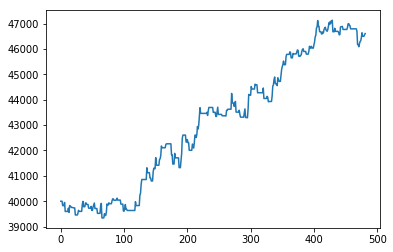

In [941]:
plt.plot(x, y_jpy)

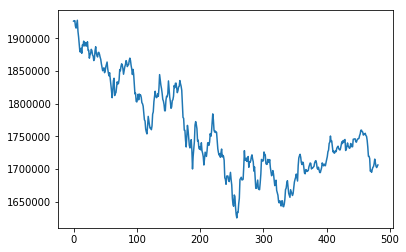

In [942]:
plt.plot(x, y_p)

In [67]:
exp_single = [indicator.loc[1000]]
data_single = np.array(exp_single, dtype=np.float32)
data_single

array([[-0.10468615, -0.24378949,  1.17827272,  0.31623939, -0.18529482,
        -0.30773506, -0.22841381, -0.77849382, -0.74054968, -0.65952748,
        -1.2418139 , -0.67521131, -0.88793594,  0.        ,  0.        ,
         0.        ,  0.        ,  0.68722892,  1.45043373, -0.45318955,
         0.09282427,  1.86361432, -0.63901508,  0.07308167,  0.70833331]], dtype=float32)

In [47]:
test.price.shift(0)

1060    2
1061    0
1062    1
1063    0
1064    0
1065    0
1066    0
1067    0
1068    0
1069    0
1070    0
1071    0
1072    0
1073    2
1074    2
1075    0
1076    0
1077    0
1078    1
1079    0
1080    2
1081    2
1082    2
1083    2
1084    2
1085    2
1086    0
1087    0
1088    2
1089    2
       ..
1126    0
1127    0
1128    0
1129    0
1130    0
1131    0
1132    1
1133    0
1134    0
1135    2
1136    2
1137    0
1138    0
1139    0
1140    0
1141    2
1142    2
1143    0
1144    0
1145    2
1146    2
1147    2
1148    2
1149    2
1150    0
1151    0
1152    0
1153    2
1154    0
1155    1
Name: price, Length: 96, dtype: int32